# 📘 Day 2 – LLMs as Semantic Instruments

## Why Meaning Exploration Matters

Understanding **meaning** in text—whether through q**ualitative interpretation** or **quantitative analysis**—is critical for research across disciplines. It allows to uncover patterns, compare perspectives, and derive insights from unstructured data. While traditional methods rely on manual coding or keyword searches, AI-driven approaches (like generative models and sentence embeddings) enable scalable, nuanced, and reproducible analysis.

**Use Cases & Examples**

- Compare theoretical frameworks in literature reviews.
- Analyze political discourse for shifts in rhetoric over time.
- Cluster survey responses to identify emerging themes.
- Track customer sentiment in product reviews.
- Detect semantic similarities in legal documents for case law research.
- Automate thematic tagging in large-scale reports.

In [ ]:
## Current Approaches to Meaning Exploration

| **Approach**                                                 | **Use**                                                                    | **Limitations**                                            | **Emerging Alternatives**                                                                                             |
| ------------------------------------------------------------ | -------------------------------------------------------------------------- | ---------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------- |
| **Generative AI**<br>(e.g., Gemini, GPT-4)                   | - Qualitative interpretation<br>- Summarization<br>- Hypothesis generation | - Hallucinations<br>- API dependency<br>- Cost             | - Smaller, domain-specific LLMs (e.g., BioBERT)<br>- Open-weight models (Llama 3, Mistral)                            |
| **Sentence Embeddings**<br>(e.g., SBERT, all-MiniLM-L6-v2)   | - Semantic similarity<br>- Clustering<br>- Search                          | - Struggles with irony/sarcasm<br>- Static representations | - Dynamic embeddings (e.g., `text-embedding-3`)<br>- Multimodal embeddings (text + image/audio)                       |
| **Hybrid**<br>(Embeddings + Generative AI)                   | - Scalable analysis<br>- Human-readable insights                           | - Integration complexity                                   | - RAG (Retrieval-Augmented Generation)<br>- Auto-labeling (e.g., Prodigy + Active Learning)                           |
| **Traditional Methods**<br>(Manual Coding, Lexical Analysis) | - Ground-truth validation<br>- Small datasets                              | - Labor-intensive<br>- Subjective                          | - AI-assisted coding (e.g., NVivo + LLMs)<br>- Rule-based with LLM fallbacks                                          |
| **Experimental**                                             | - Neurosymbolic AI<br>- Attention Mechanisms<br>- Knowledge Graphs         | *N/A (frontier work)*                                      | - Combining symbolic logic with LLMs<br>- BERT-style attention visualization<br>- Entity linking via knowledge graphs |

**How to Choose an Approach**:

| **Need**              | **Best Current Tool**  | **Future Alternative**       |
| --------------------- | ---------------------- | ---------------------------- |
| Explain nuances       | Generative AI          | Neurosymbolic AI             |
| Cluster 10k documents | Sentence Embeddings    | Multimodal Embeddings        |
| Validate hypotheses   | Hybrid + Manual Coding | AI-assisted annotation tools |


SyntaxError: invalid decimal literal (ipython-input-1-354876724.py, line 16)

## 1️⃣ Gemini Meaning Probes

This approach uses language understanding to generate human-like explanations of meaning.

Best for:

- Qualitative, nuanced comparisons (e.g., "How do these sentences differ in intent?")

- Contextual understanding (e.g., political implications, tone, implied meaning)

- When you need a narrative explanation rather than raw data



Use Google Gemini (via API) to interpret sentence meaning.

➡️ Requires a free [Gemini API key](https://makersuite.google.com/app/apikey).

In [1]:
!pip install -q -U google-genai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 5.4 MB/s eta 0:00:00


In [2]:
from google.colab import userdata
import google.generativeai as genai

# Retrieve the API key from Secrets
api_key = userdata.get('GEMINI_API_KEY')  # Name must match what you set!

# Configure Gemini
genai.configure(api_key=api_key)



Compare Texts

In [3]:
# Example usage
model = genai.GenerativeModel('gemini-2.0-flash')
prompt = "Compare the meaning of: 'The minister supported the bill.' and 'The minister opposed the bill.'"
response = model.generate_content(prompt)
print(response.text)

The two sentences have opposite meanings:

*   **'The minister supported the bill.'** means the minister was in favor of the bill and likely took actions to help it pass, such as voting for it, speaking in favor of it, or lobbying others to support it. The minister wanted the bill to become law.

*   **'The minister opposed the bill.'** means the minister was against the bill and likely took actions to prevent it from passing, such as voting against it, speaking out against it, or lobbying others to oppose it. The minister did not want the bill to become law.

In short, "supported" indicates agreement and active assistance, while "opposed" indicates disagreement and active resistance.



## 2️⃣ Hugging Face Sentence Embeddings

We now compute vector representations using `sentence-transformers`.

This approach converts text into numerical vectors (embeddings) that capture semantic meaning.

It allows mathematical comparison (e.g., **cosine similarity**) of sentences.

**Which model to use**

The [`all-MiniLM-L6-v2`](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2) model is a popular default for sentence embeddings due to its balance of speed and performance, but it may not always be the best fit.

 **Why `all-MiniLM-L6-v2`?**
>
> - It is **small and fast**, ideal for live demos or classroom settings.
> - Trained specifically for **semantic similarity tasks**, making it highly effective for comparing sentence meanings.
> - Outputs **384-dimensional vectors**, balancing speed with representational depth.
> - Part of the `sentence-transformers` library, maintained by Hugging Face and SBERT.net.
> - Pretrained on **general and question-answer datasets**, making it robust for diverse domains.


Not the best choice if:

- You need multilingual support (it’s English-only).

- Your task requires domain-specific understanding (e.g., legal, biomedical).

- You need higher-dimensional embeddings for fine-grained similarity.

**Sentence Embedding Models – General English (Better Performance)**

| **Model**                   | **Dimensions** | **Speed** | **Use Case**                                           |
| --------------------------- | -------------- | --------- | ------------------------------------------------------ |
| `all-mpnet-base-v2`         | 768            | Slower    | Higher accuracy than MiniLM. Best for semantic search. |
| `gte-base` (*General Text*) | 768            | Medium    | Stronger out-of-the-box performance than MiniLM.       |
| `e5-base-v2` (*Embeddings*) | 768            | Medium    | Optimized for retrieval tasks (e.g., RAG).             |


**🏛️ Sentence Embedding Models – Domain-Specific Tasks**

| **Model**                  | **Domain** | **Dimensions** | **Notes**                                       |
| -------------------------- | ---------- | -------------- | ----------------------------------------------- |
| `BioBERT` *(Hugging Face)* | Biomedical | 768            | Fine-tuned for medical/life sciences.           |
| `Legal-BERT`               | Legal      | 768            | Trained on court cases and contracts.           |
| `FinBERT`                  | Financial  | 768            | Optimized for earnings reports and SEC filings. |


In [4]:
from sentence_transformers import SentenceTransformer
import numpy as np

model = SentenceTransformer('all-MiniLM-L6-v2')

sentences = [
    "The minister supported the bill.",
    "The minister opposed the bill.",
    "The bill was popular among voters.",
    "Many citizens disagreed with the proposal."
]

embeddings = model.encode(sentences)
print("Embedding shape:", embeddings.shape)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Embedding shape: (4, 384)


**How to Test Alternatives?**

Compare Embedding Quality:
Lower values indicate better discrimination between opposites.

In [5]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

models = {
    "MiniLM": "all-MiniLM-L6-v2",
    "MPNet": "all-mpnet-base-v2",
    "BGE": "BAAI/bge-large-en-v1.5"
}

sentences = ["The minister supported the bill.", "The minister opposed the bill."]

for name, model_name in models.items():
    model = SentenceTransformer(model_name)
    embeddings = model.encode(sentences)
    sim = cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]
    print(f"{name}: Similarity = {sim:.2f}")

MiniLM: Similarity = 0.84


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

MPNet: Similarity = 0.53


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/779 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

BGE: Similarity = 0.76


## 3️⃣ Meaning Matrix Heatmap

We compute cosine similarity between sentence embeddings and plot a matrix.

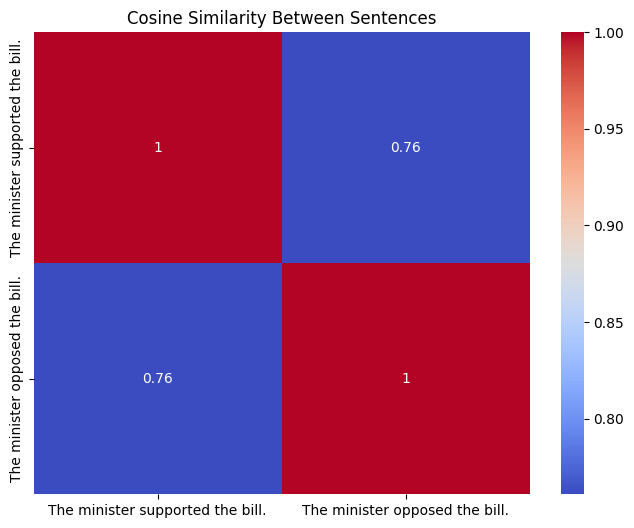

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

sim_matrix = cosine_similarity(embeddings)

plt.figure(figsize=(8, 6))
sns.heatmap(sim_matrix, xticklabels=sentences, yticklabels=sentences, annot=True, cmap="coolwarm")
plt.title("Cosine Similarity Between Sentences")
plt.show()

## 4️⃣ Semantic Drift Demo

Example showing how small changes in wording can change meaning vectors.

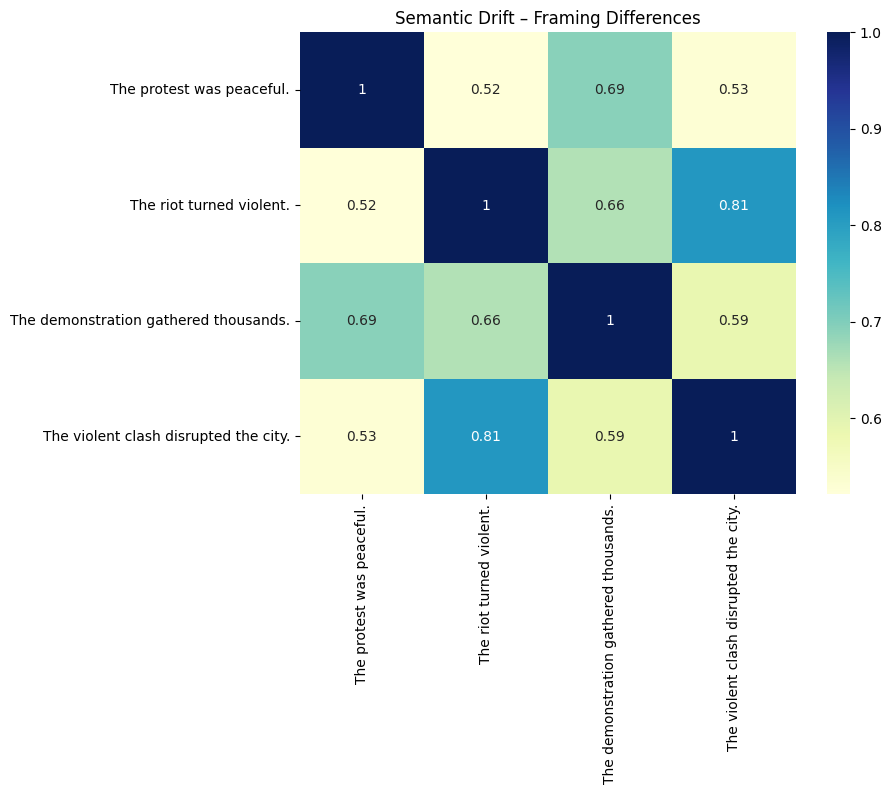

In [7]:
drift_sentences = [
    "The protest was peaceful.",
    "The riot turned violent.",
    "The demonstration gathered thousands.",
    "The violent clash disrupted the city."
]

drift_embeddings = model.encode(drift_sentences)
drift_sim = cosine_similarity(drift_embeddings)

plt.figure(figsize=(8, 6))
sns.heatmap(drift_sim, xticklabels=drift_sentences, yticklabels=drift_sentences, annot=True, cmap="YlGnBu")
plt.title("Semantic Drift – Framing Differences")
plt.show()

## 5️⃣ Annotator Disagreement Simulation

Simulate two annotators assigning sentiment to the same set of sentences.

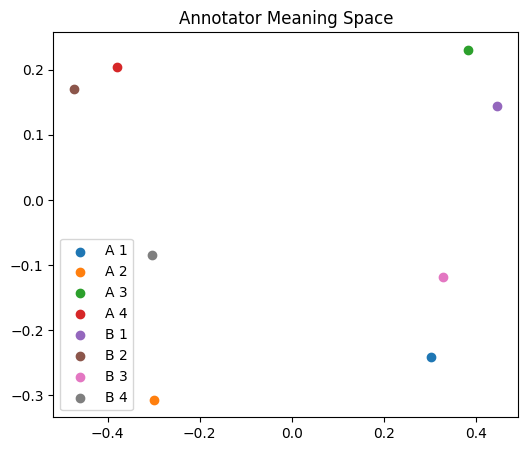

In [8]:
coder_A = [
    "The project was successful.",
    "The project had issues.",
    "The plan worked well.",
    "The initiative was flawed."
]

coder_B = [
    "The plan was a success.",
    "There were serious flaws.",
    "The outcome was positive.",
    "The result was problematic."
]

emb_A = model.encode(coder_A)
emb_B = model.encode(coder_B)

from sklearn.decomposition import PCA

combined = np.vstack([emb_A, emb_B])
labels = ['A']*4 + ['B']*4
pca = PCA(n_components=2)
reduced = pca.fit_transform(combined)

plt.figure(figsize=(6, 5))
for i, label in enumerate(labels):
    plt.scatter(reduced[i, 0], reduced[i, 1], label=f"{label} {i%4 + 1}")
plt.title("Annotator Meaning Space")
plt.legend()
plt.show()

## 🔁 Recap & What’s Next

- Gemini shows qualitative interpretation
- HF gives numerical vectors
- Cosine and PCA reveal deep semantic structure

➡️ In Session 2, we’ll use these vectors for classification, clustering, and retrieval.

---